In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('/content/updated_preprocessed_data.csv')

In [3]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [4]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
df.drop(columns=['reviewText', 'summary',], inplace=True)

In [6]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
overall              0
verified             0
text                 0
additional_clean    59
sentiment            0
dtype: int64


In [7]:
df['additional_clean'].fillna('', inplace=True)

In [8]:
df = df[df['verified'] == True]

In [9]:
def get_sentiment_vader(text):
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score['compound']

In [10]:
def get_sentiment_textblob(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [11]:
df['sentiment_vader'] = df['additional_clean'].apply(get_sentiment_vader)
df['sentiment_textblob'] = df['additional_clean'].apply(get_sentiment_textblob)


In [12]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

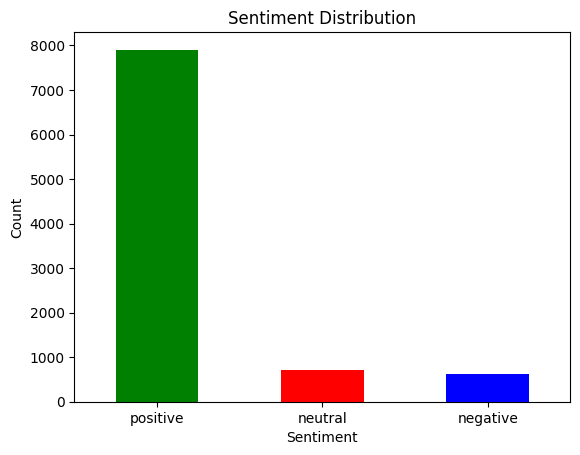

In [13]:
sentiment_counts = df['sentiment_vader'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral').value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

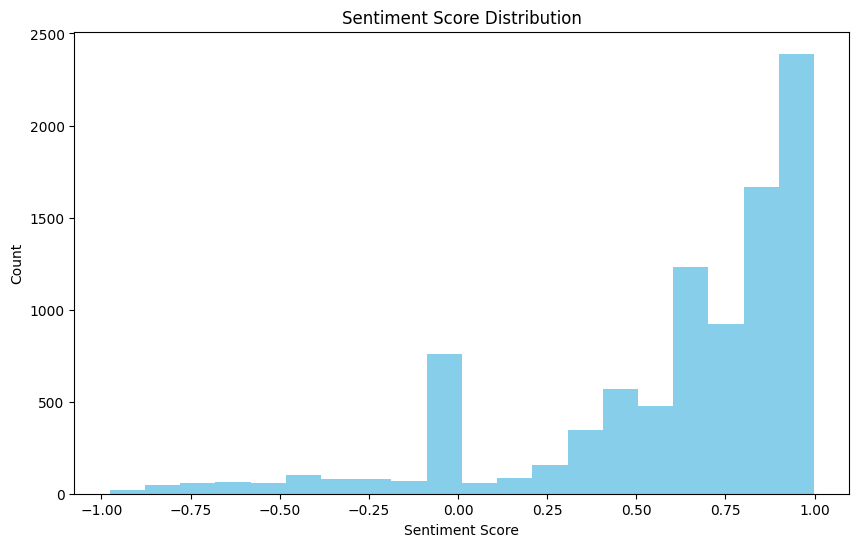

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment_vader'], bins=20, color='skyblue')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

In [14]:
words_to_remove= ['color','loose fit','plastic','seizeing','pair', 'chain', 'short','item','run', 'bit','stretch','everything','shoe', 'size', 'carhartt', 'though', 'need', 'hard', 'work', 'bought', 'wear', 'costume', 'feel', 'part', 'daughter','needed', 'actually', 'found', 'return', 'kind', 'waist', 'top', 'summer', 'dress']

In [15]:
def remove_words(text):
    for word in words_to_remove:
        text = text.replace(word, '')
    return text

In [16]:
df['clean_text'] = df['additional_clean'].apply(remove_words)

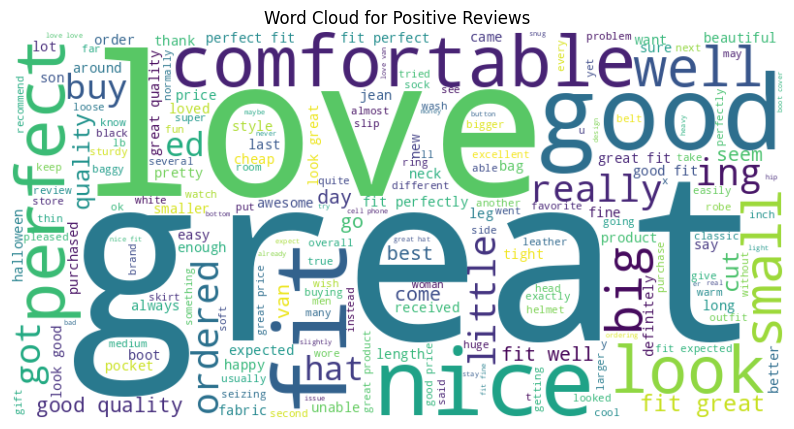

In [17]:
positive_reviews = df[df['sentiment_vader'] > 0]['clean_text'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

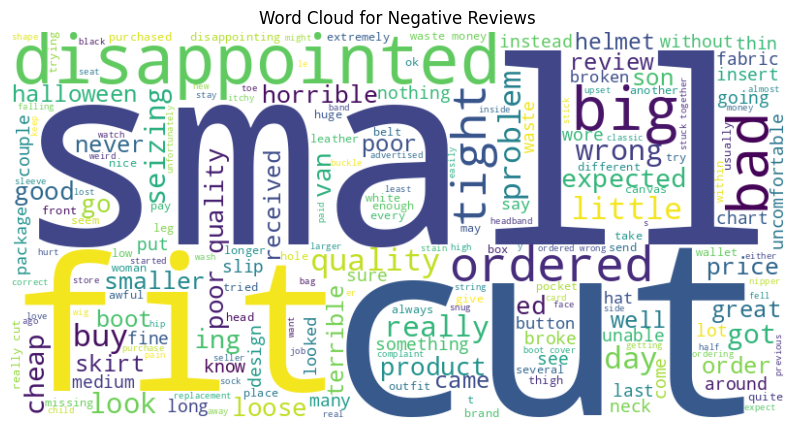

In [18]:
negative_reviews = df[df['sentiment_vader'] < 0]['clean_text'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

In [ ]:
aspect_categories = ['quality', 'fit', 'design', 'customer service']

In [ ]:
aspect_sentiments = {}
for aspect in aspect_categories:
    aspect_reviews = df[df['text'].str.contains(aspect)]
    aspect_sentiments[aspect] = aspect_reviews['additional_clean'].apply(get_sentiment_vader).mean()


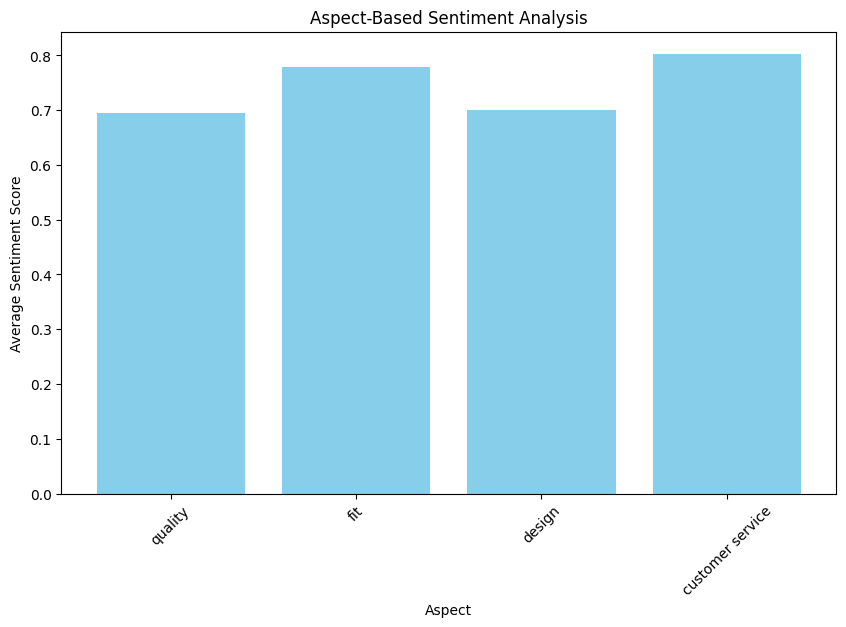

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(aspect_sentiments.keys(), aspect_sentiments.values(), color='skyblue')
plt.title('Aspect-Based Sentiment Analysis')
plt.xlabel('Aspect')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['review_length'] = df['text'].apply(lambda x: len(x.split()))

In [ ]:
short_reviews = df[df['review_length'] <= 50]
medium_reviews = df[(df['review_length'] > 50) & (df['review_length'] <= 100)]
long_reviews = df[df['review_length'] > 100]

In [ ]:
short_sentiment = short_reviews['additional_clean'].apply(get_sentiment_vader).mean()
medium_sentiment = medium_reviews['additional_clean'].apply(get_sentiment_vader).mean()
long_sentiment = long_reviews['additional_clean'].apply(get_sentiment_vader).mean()

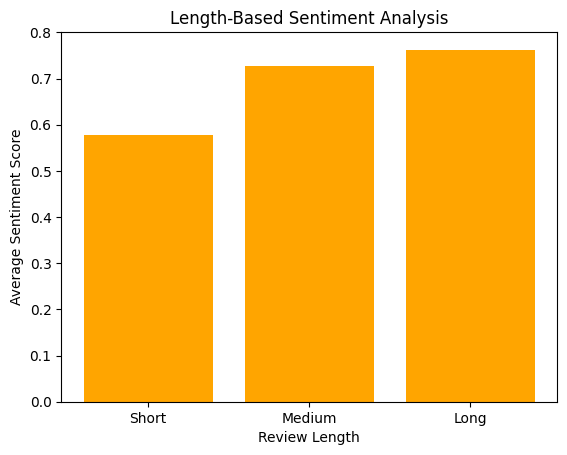

In [ ]:
sentiments = [short_sentiment, medium_sentiment, long_sentiment]
categories = ['Short', 'Medium', 'Long']
plt.bar(categories, sentiments, color='orange')
plt.title('Length-Based Sentiment Analysis')
plt.xlabel('Review Length')
plt.ylabel('Average Sentiment Score')
plt.show()

In [ ]:
def get_emotion(text):
    blob = TextBlob(text)
    return blob.sentiment

In [ ]:
df['emotions'] = df['additional_clean'].apply(get_emotion)

In [ ]:
df['polarity'] = df['emotions'].apply(lambda x: x.polarity)
df['subjectivity'] = df['emotions'].apply(lambda x: x.subjectivity)

In [ ]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Count')

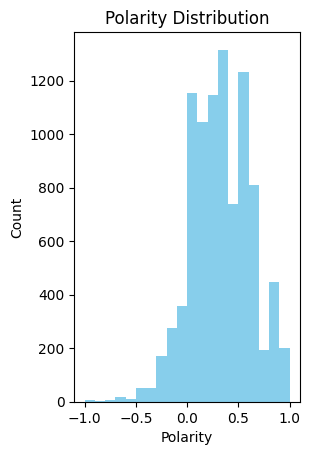

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(df['polarity'], bins=20, color='skyblue')
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Count')

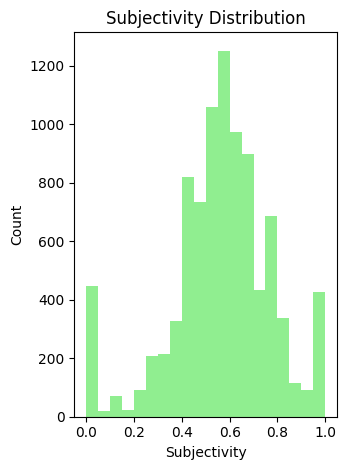

In [ ]:
plt.subplot(1, 2, 2)
plt.hist(df['subjectivity'], bins=20, color='lightgreen')
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Count')

plt.tight_layout()
plt.show()